The dataset for this task contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. It is labelled as 0 and 1 , where 0 indicates no stress and 1 indicates stress.


In [1]:
import pandas as pd
df = pd.read_csv("stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [2]:
df.shape

(2838, 116)

In [3]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [4]:
# check for null values
df.isna().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

dataset does not conrain any null values

prepare the text column of this dataset to clean the text column with stopwords, links, special symbols and language errors

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text



In [7]:
df1 = df.copy()

In [8]:
df1.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [9]:
df1["text"] = df1["text"].apply(clean)


In [10]:
df1.text[0]

'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour'

In [11]:
df.text[0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

 have a look at the most used words by the people sharing about their life problems

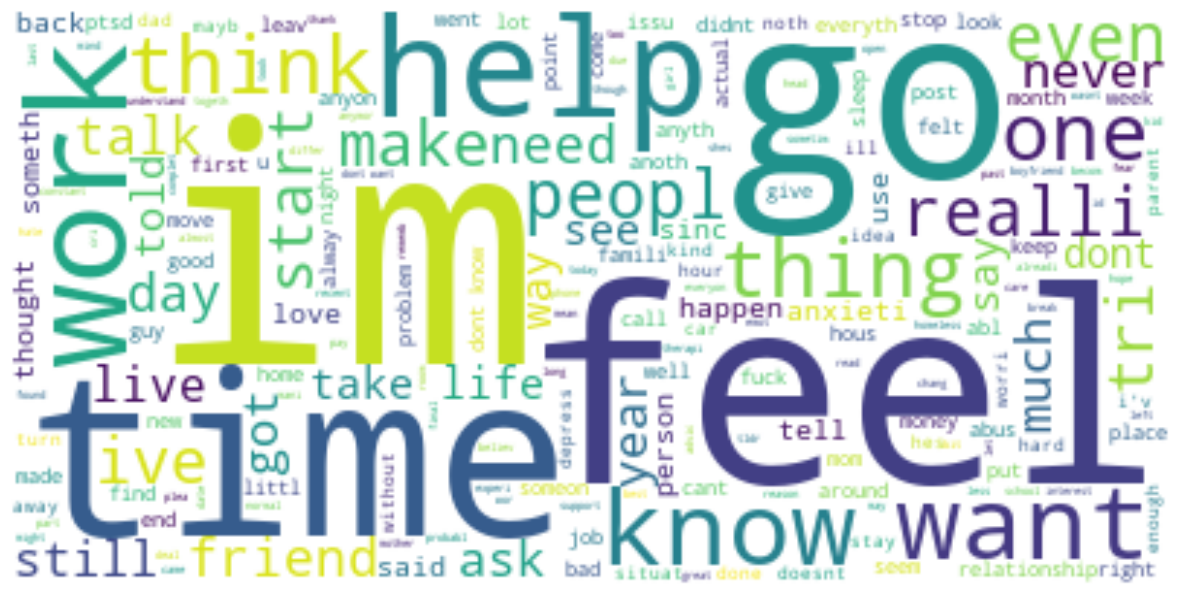

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in df1.text)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15, 10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [84]:
# we only require two columns from th dataset
# text and label
df1["label"] = df1["label"].map({0: "No Stress", 1: "Stress"})
df2 = df1[["text", "label"]]
df2.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


# model training


In [85]:
import numpy as np

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = np.array(df2.text)
y = np.array(df2.label)

cv = CountVectorizer()
X = cv.fit_transform(X)
X

<2838x7842 sparse matrix of type '<class 'numpy.int64'>'
	with 98832 stored elements in Compressed Sparse Row format>

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 42)


In [146]:
X_train

<1702x7842 sparse matrix of type '<class 'numpy.int64'>'
	with 59129 stored elements in Compressed Sparse Row format>

compare different classification algorithims

In [18]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import ShuffleSplit

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
c:\Users\Administrator\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
       'RandomForestClassifier' : {
           'model' : RandomForestClassifier(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2']
           }
       },
       'PassiveAggressiveRegressor': {
        'model': PassiveAggressiveRegressor(),
        'params':{
                'C' : np.logspace(-4, 4, 20),
                'fit_intercept': [True, False],
                'early_stopping': [True, False],
                'shuffle': [True, False],
                'epsilon': np.logspace(-4, 4, 20),
                'warm_start': [True, False],
                'average': [True, False]
        }
        },
        'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,10,100,1000],
            'kernel': ['rbf','linear']
        }  
        },
        'BernoulliNB': {
        'model': BernoulliNB(),
        'params':{
            'fit_prior': [True, False]
        }
        },
        'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors': np.logspace(0, 100, 20),
            'weights': ["uniform", "distance"],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
            
        }
    }

    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [23]:
find_best_model_using_gridsearchcv(X_train, y_train)

[16:55:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:56] WARNING:

,model,best_score,best_params
0,decision_tree,0.624670,"{'criterion': 'entropy', 'splitter': 'best'}"
1,XGBoost,0.714978,"{'gamma': 1, 'max_depth': 3, 'min_child_weight..."
2,LogisticRegression,0.734361,"{'C': 0.03359818286283781, 'penalty': 'l2', 's..."
3,RandomForestClassifier,0.727313,"{'max_features': 'auto', 'n_estimators': 90}"
4,PassiveAggressiveRegressor,0.184691,"{'C': 0.0001, 'average': True, 'early_stopping..."
5,svm,0.723348,"{'C': 1, 'kernel': 'rbf'}"
6,BernoulliNB,0.743172,{'fit_prior': False}
7,KNeighborsClassifier,NaN,"{'algorithm': 'auto', 'n_neighbors': 1.0, 'wei..."


BernoulliNB best classifier with 74.3172% score

In [147]:
# train a classiffier
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [148]:
# do a prediction
y_pred = model.predict(X_test)
y_pred

array(['No Stress', 'No Stress', 'Stress', ..., 'No Stress', 'Stress',
       'No Stress'], dtype='<U9')

In [149]:
model.score(X_test, y_test)

0.7315140845070423

use cross validation to evalauate the model

In [150]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits= 10)
score = cross_val_score(model, X_train, y_train, cv= kfold)
score.mean()


0.7209425524595804

confusion matrix and classification report

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   No Stress       0.78      0.62      0.69       551
      Stress       0.70      0.84      0.76       585

    accuracy                           0.73      1136
   macro avg       0.74      0.73      0.73      1136
weighted avg       0.74      0.73      0.73      1136



In [152]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[339, 212],
       [ 93, 492]], dtype=int64)

Text(108.22222222222221, 0.5, 'Truth')

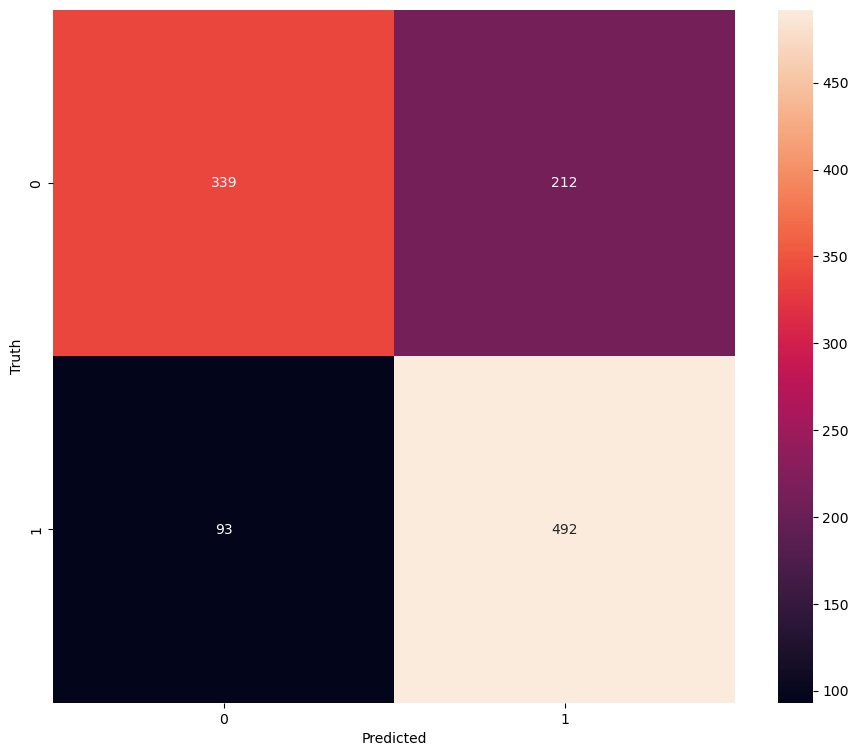

In [153]:
import seaborn as sn
plt.figure(figsize= (11,9))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

try prediction from user input

In [165]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
prob = np.round(model.predict_proba(data) * 100, 2).tolist()[0]
print("no stress:", prob[0], "stress:", prob[1])

no stress: 45.77 stress: 54.23


In [166]:
import pickle
with open('stress.pickle', 'wb') as f:
    pickle.dump(model, f)